In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# saved from infCutoff.ipynb and baseline.ipynb
with open('./results/pickles/baseline_classSpecific_Clf_alpha.pkl', 'rb') as f:
    results_df_baseline_classSpec = pickle.load(f)
with open('./results/pickles/baseline_marginal_Clf_alpha.pkl', 'rb') as f:
    results_df_baseline_marginal = pickle.load(f)
with open('./results/pickles/conformal_aps_Clf_alpha.pkl', 'rb') as f:
    results_df_conformal = pickle.load(f)
with open('./results/pickles/setClf_alpha.pkl', 'rb') as f:
    results_df_conservative = pickle.load(f)

In [4]:
alpha_grid = np.array([0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.01])

In [5]:
with open('./data/split_data.pkl', 'rb') as f:
    d = pickle.load(f)
    train_set, calibration_set, test_set = d['train_set'], d['calibration_set'], d['test_set']
train_set.shape, calibration_set.shape, test_set.shape

((48000, 102), (28000, 102), (4000, 102))

In [6]:
# nu test not used. mu test only to check results
X_test, nu_test, y_test = test_set.drop(columns=['run_name', 'cell_type']).values, test_set.loc[:, 'run_name'].values, test_set.loc[:, 'cell_type'].values.astype(int)
X_test.shape, nu_test.shape, y_test.shape

((4000, 100), (4000,), (4000,))

## Marginal Coverage

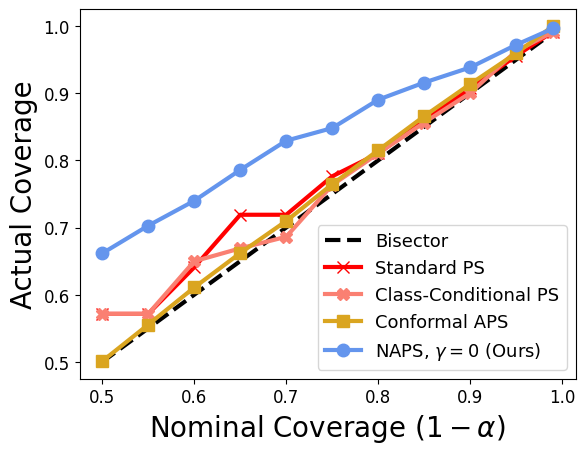

In [56]:
plt.plot(1-alpha_grid, 1-alpha_grid, linestyle='--', linewidth=3, color='black', label='Bisector')

# baseline class-specific
plt.plot(
    1-alpha_grid,
    [results_df_baseline_marginal.loc[(results_df_baseline_marginal.loc[:, col] == results_df_baseline_marginal.true) | (results_df_baseline_marginal.loc[:, col] == -1), :].shape[0] / results_df_baseline_marginal.shape[0]
    for col in results_df_baseline_marginal.drop(columns='true').columns],
    linestyle='-', linewidth=3, marker='x', markersize=9, color='red', label='Standard PS'
)

# baseline class-specific
plt.plot(
    1-alpha_grid,
    [results_df_baseline_classSpec.loc[(results_df_baseline_classSpec.loc[:, col] == results_df_baseline_classSpec.true) | (results_df_baseline_classSpec.loc[:, col] == -1), :].shape[0] / results_df_baseline_classSpec.shape[0]
    for col in results_df_baseline_classSpec.drop(columns='true').columns],
    linestyle='-', linewidth=3, marker='X', markersize=9, color='salmon', label='Class-Conditional PS'
)

# baseline class-specific
plt.plot(
    1-alpha_grid,
    [results_df_conformal.loc[(results_df_conformal.loc[:, col] == results_df_conformal.true) | (results_df_conformal.loc[:, col] == -1), :].shape[0] / results_df_conformal.shape[0]
    for col in results_df_conformal.drop(columns='true').columns],
    linestyle='-', linewidth=3, marker='s', markersize=9, color='goldenrod', label='Conformal APS'
)

# ours
plt.plot(
    1-alpha_grid,
    [results_df_conservative.loc[(results_df_conservative.loc[:, col] == results_df_conservative.true) | (results_df_conservative.loc[:, col] == -1), :].shape[0] / results_df_conservative.shape[0]
    for col in results_df_conservative.drop(columns='true').columns],
    linestyle='-', linewidth=3, marker='o', markersize=9, color='cornflowerblue', label=r'NAPS, $\gamma=0$ (Ours)'
)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel(r'Nominal Coverage $(1-\alpha)$', fontsize=20)
plt.ylabel('Actual Coverage', fontsize=20)
plt.legend(prop={'size': 13})
plt.show()

## Conditional Coverage

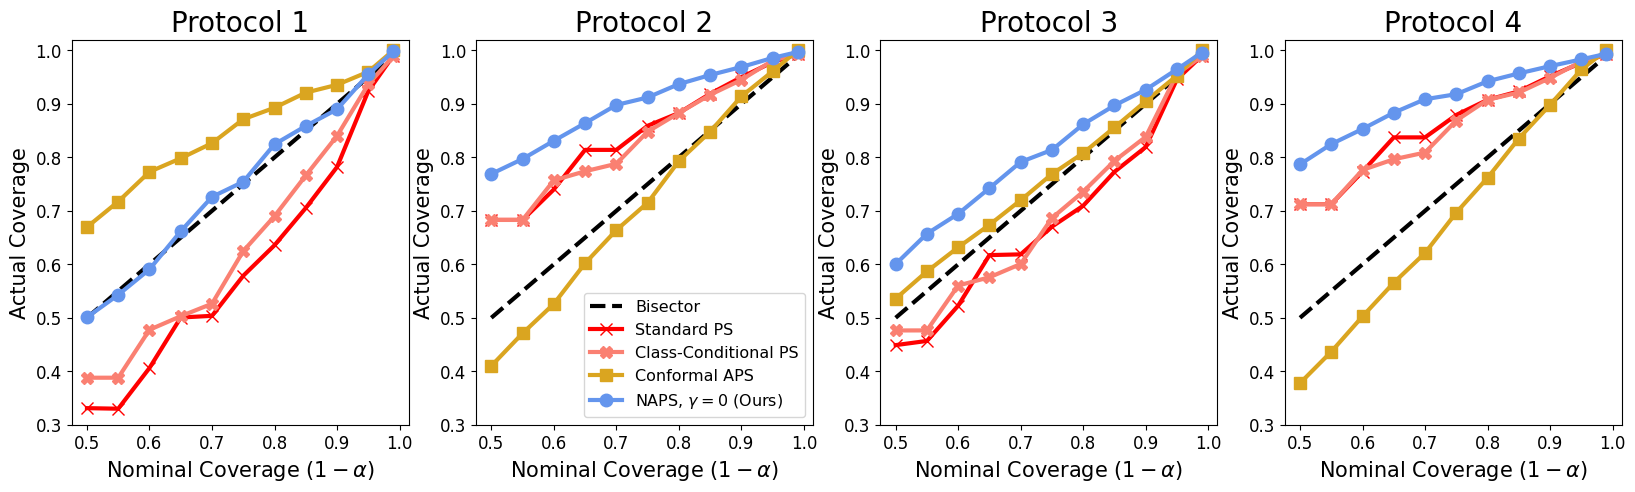

In [52]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

for i, nu in enumerate(['V2 only', 'V3 only', 'Low V3', 'High V3']):

    ax[i].plot(1-alpha_grid, 1-alpha_grid, linestyle='--', linewidth=3, color='black', label='Bisector')

    # set-clf, marginal
    ax[i].plot(
        1-alpha_grid,
        [results_df_baseline_marginal.loc[((results_df_baseline_marginal.loc[:, col] == results_df_baseline_marginal.true) | (results_df_baseline_marginal.loc[:, col] == -1)) & (nu_test == nu), :].shape[0] / results_df_baseline_marginal.loc[nu_test == nu, :].shape[0]
        for col in results_df_baseline_marginal.drop(columns='true').columns],
        linestyle='-', linewidth=3, marker='x', markersize=9, color='red', label='Standard PS'
    )

    # set-clf, class-specific
    ax[i].plot(
        1-alpha_grid,
        [results_df_baseline_classSpec.loc[((results_df_baseline_classSpec.loc[:, col] == results_df_baseline_classSpec.true) | (results_df_baseline_classSpec.loc[:, col] == -1)) & (nu_test == nu), :].shape[0] / results_df_baseline_classSpec.loc[nu_test == nu, :].shape[0]
        for col in results_df_baseline_classSpec.drop(columns='true').columns],
        linestyle='-', linewidth=3, marker='X', markersize=9, color='salmon', label='Class-Conditional PS'
    )
    
    # conformal
    ax[i].plot(
            1-alpha_grid,
            [results_df_conformal.loc[((results_df_conformal.loc[:, col] == results_df_conformal.true) | (results_df_conformal.loc[:, col] == -1)) & (nu_test == nu), :].shape[0] / results_df_conformal.loc[nu_test == nu, :].shape[0]
            for col in results_df_conformal.drop(columns='true').columns],
            linestyle='-', linewidth=3, marker='s', markersize=9, color='goldenrod', label='Conformal APS'
        )

    # ours
    ax[i].plot(
        1-alpha_grid,
        [results_df_conservative.loc[((results_df_conservative.loc[:, col] == results_df_conservative.true) | (results_df_conservative.loc[:, col] == -1)) & (nu_test == nu), :].shape[0] / results_df_conservative.loc[nu_test == nu, :].shape[0]
        for col in results_df_conservative.drop(columns='true').columns],
        linestyle='-', linewidth=3, marker='o', markersize=9, color='cornflowerblue', label=r'NAPS, $\gamma=0$ (Ours)'
    )

    ax[i].set_ylim(0.3, 1.02)

    ax[i].set_xlabel(r'Nominal Coverage $(1-\alpha)$', fontsize=15)
    ax[i].set_ylabel('Actual Coverage', fontsize=15)
    ax[i].tick_params(axis='both', which='major', labelsize=12)
    if i == 1:
        ax[i].legend(loc='lower right', prop={'size': 11.5})
    ax[i].set_title(f'Protocol {i+1}', fontsize=20)
    #ax[i].set_ylim(0.35, 1)

plt.savefig('./results/figures/conditional_coverage.pdf')
plt.show()

## Within true label

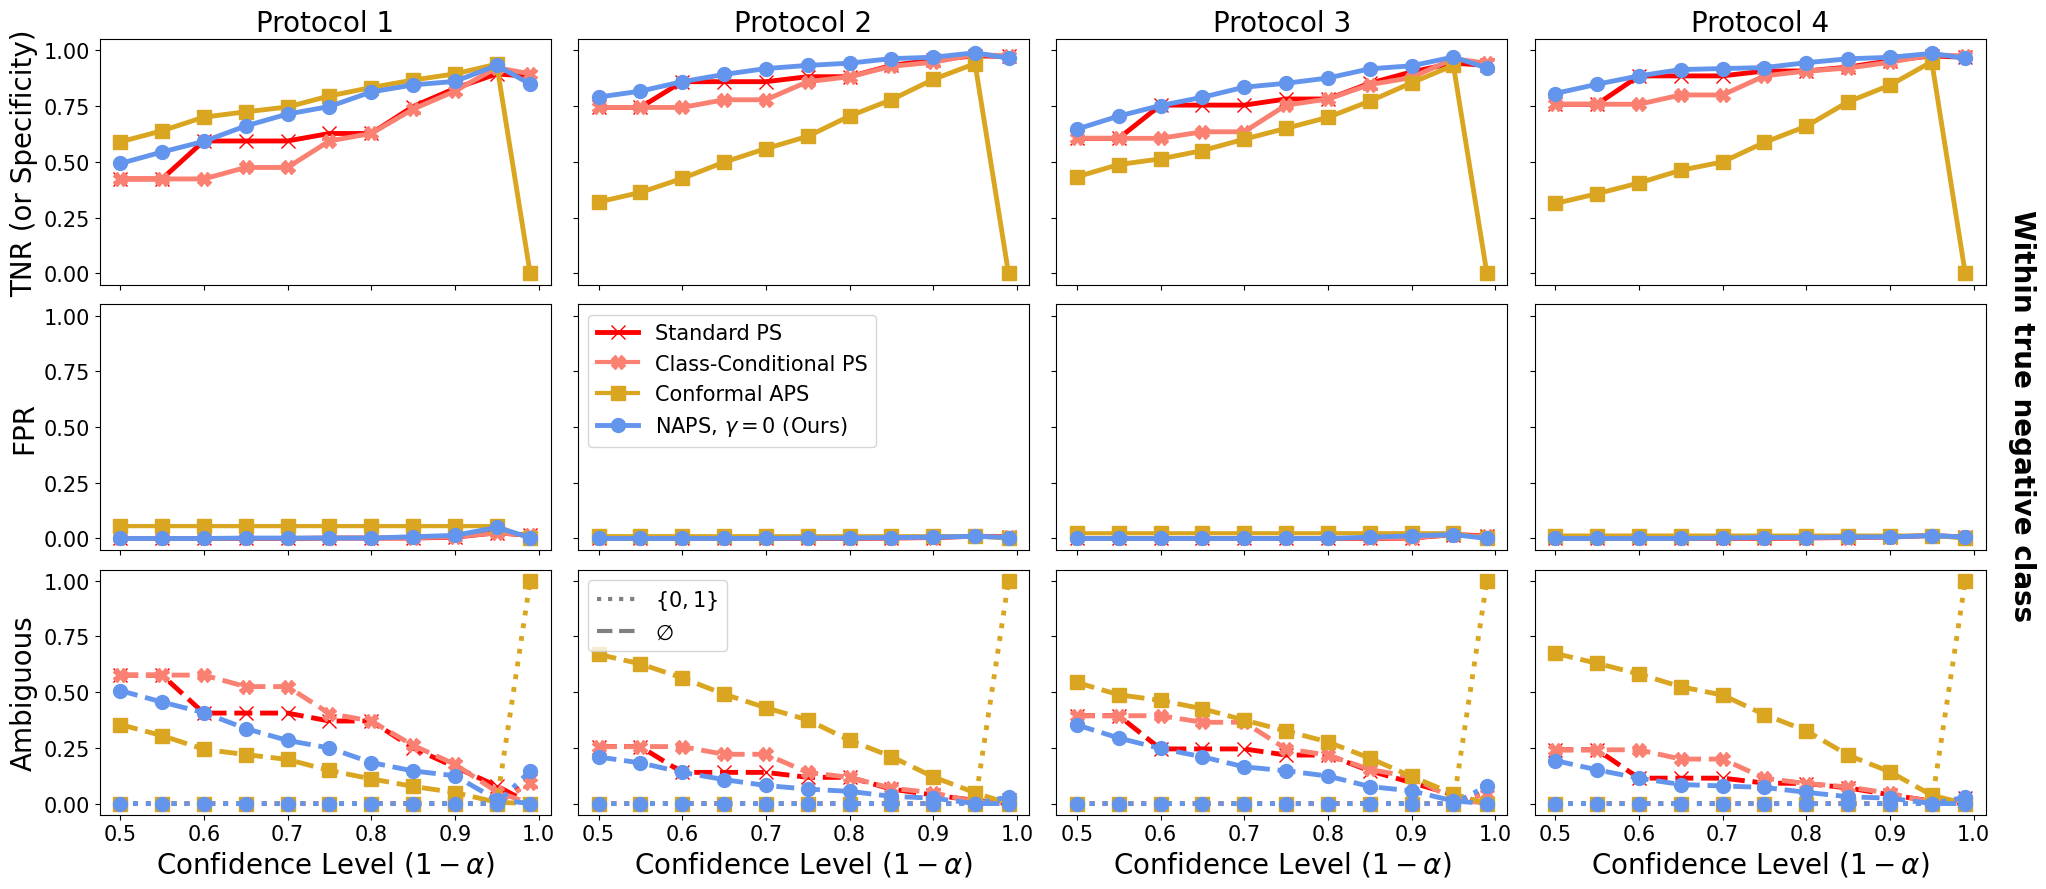

In [45]:
label = 0
fig, ax = plt.subplots(3, 4, figsize=(20, 9))

linewidth = 3.5
markersize = 10

for i, nu in enumerate(['V2 only', 'V3 only', 'Low V3', 'High V3']):

    nu_y_masks = (nu_test == nu) & (y_test == label)

    # set-clf, marginal
    ax[0][i].plot(
        1-alpha_grid,
        [results_df_baseline_marginal.loc[(results_df_baseline_marginal.loc[:, col] == label) & nu_y_masks, :].shape[0] / results_df_baseline_marginal.loc[nu_y_masks, :].shape[0]
        for col in results_df_baseline_marginal.drop(columns='true').columns],
        linestyle='-', linewidth=linewidth, marker='x', markersize=markersize, color='red', label='Standard PS'
    )
    ax[1][i].plot(
        1-alpha_grid,
        [results_df_baseline_marginal.loc[(results_df_baseline_marginal.loc[:, col] == (1-label)) & nu_y_masks, :].shape[0] / results_df_baseline_marginal.loc[nu_y_masks, :].shape[0]
        for col in results_df_baseline_marginal.drop(columns='true').columns],
        linestyle='-', linewidth=linewidth, marker='x', markersize=markersize, color='red', label='Standard PS'
    )
    ax[2][i].plot(
        1-alpha_grid,
        [results_df_baseline_marginal.loc[(results_df_baseline_marginal.loc[:, col] == -1) & nu_y_masks, :].shape[0] / results_df_baseline_marginal.loc[nu_y_masks, :].shape[0]
        for col in results_df_baseline_marginal.drop(columns='true').columns],
        linestyle=':', linewidth=linewidth, marker='x', markersize=markersize, color='red'#, label=r'$\{0, 1\}$, Set-Clf'
    )
    ax[2][i].plot(
        1-alpha_grid,
        [results_df_baseline_marginal.loc[(results_df_baseline_marginal.loc[:, col] == -2) & nu_y_masks, :].shape[0] / results_df_baseline_marginal.loc[nu_y_masks, :].shape[0]
        for col in results_df_baseline_marginal.drop(columns='true').columns],
        linestyle='--', linewidth=linewidth, marker='x', markersize=markersize, color='red'#, label=r'$\emptyset$, Set-Clf'
    )

    # set-clf, class-specific
    ax[0][i].plot(
        1-alpha_grid,
        [results_df_baseline_classSpec.loc[(results_df_baseline_classSpec.loc[:, col] == label) & nu_y_masks, :].shape[0] / results_df_baseline_classSpec.loc[nu_y_masks, :].shape[0]
        for col in results_df_baseline_classSpec.drop(columns='true').columns],
        linestyle='-', linewidth=linewidth, marker='X', markersize=markersize, color='salmon', label='Class-Conditional PS'
    )
    ax[1][i].plot(
        1-alpha_grid,
        [results_df_baseline_classSpec.loc[(results_df_baseline_classSpec.loc[:, col] == (1-label)) & nu_y_masks, :].shape[0] / results_df_baseline_classSpec.loc[nu_y_masks, :].shape[0]
        for col in results_df_baseline_classSpec.drop(columns='true').columns],
        linestyle='-', linewidth=3, marker='X', markersize=markersize, color='salmon', label='Class-Conditional PS'
    )
    ax[2][i].plot(
        1-alpha_grid,
        [results_df_baseline_classSpec.loc[(results_df_baseline_classSpec.loc[:, col] == -1) & nu_y_masks, :].shape[0] / results_df_baseline_classSpec.loc[nu_y_masks, :].shape[0]
        for col in results_df_baseline_classSpec.drop(columns='true').columns],
        linestyle=':', linewidth=linewidth, marker='X', markersize=markersize, color='salmon'#, label=r'$\{0, 1\}$, Class-Specific Set-Clf'
    )
    ax[2][i].plot(
        1-alpha_grid,
        [results_df_baseline_classSpec.loc[(results_df_baseline_classSpec.loc[:, col] == -2) & nu_y_masks, :].shape[0] / results_df_baseline_classSpec.loc[nu_y_masks, :].shape[0]
        for col in results_df_baseline_classSpec.drop(columns='true').columns],
        linestyle='--', linewidth=linewidth, marker='X', markersize=markersize, color='salmon'#, label=r'$\emptyset$, Class-Specific Set-Clf'
    )

    # conformal aps
    ax[0][i].plot(
        1-alpha_grid,
        [results_df_conformal.loc[(results_df_conformal.loc[:, col] == label) & nu_y_masks, :].shape[0] / results_df_conformal.loc[nu_y_masks, :].shape[0]
        for col in results_df_conformal.drop(columns='true').columns],
        linestyle='-', linewidth=linewidth, marker='s', markersize=markersize, color='goldenrod', label='Conformal APS'
    )
    ax[1][i].plot(
        1-alpha_grid,
        [results_df_conformal.loc[(results_df_conformal.loc[:, col] == (1-label)) & nu_y_masks, :].shape[0] / results_df_conformal.loc[nu_y_masks, :].shape[0]
        for col in results_df_conformal.drop(columns='true').columns],
        linestyle='-', linewidth=3, marker='s', markersize=markersize, color='goldenrod', label='Conformal APS'
    )
    ax[2][i].plot(
        1-alpha_grid,
        [results_df_conformal.loc[(results_df_conformal.loc[:, col] == -1) & nu_y_masks, :].shape[0] / results_df_conformal.loc[nu_y_masks, :].shape[0]
        for col in results_df_conformal.drop(columns='true').columns],
        linestyle=':', linewidth=linewidth, marker='s', markersize=markersize, color='goldenrod'#, label=r'$\{0, 1\}$, Class-Specific Set-Clf'
    )
    ax[2][i].plot(
        1-alpha_grid,
        [results_df_conformal.loc[(results_df_conformal.loc[:, col] == -2) & nu_y_masks, :].shape[0] / results_df_conformal.loc[nu_y_masks, :].shape[0]
        for col in results_df_conformal.drop(columns='true').columns],
        linestyle='--', linewidth=linewidth, marker='s', markersize=markersize, color='goldenrod'#, label=r'$\emptyset$, Class-Specific Set-Clf'
    )

    # ours
    ax[0][i].plot(
        1-alpha_grid,
        [results_df_conservative.loc[(results_df_conservative.loc[:, col] == label) & nu_y_masks, :].shape[0] / results_df_conservative.loc[nu_y_masks, :].shape[0]
        for col in results_df_conservative.drop(columns='true').columns],
        linestyle='-', linewidth=linewidth, marker='o', markersize=markersize, color='cornflowerblue', label=r'NAPS, $\gamma=0$ (Ours)'
    )
    ax[1][i].plot(
        1-alpha_grid,
        [results_df_conservative.loc[(results_df_conservative.loc[:, col] == (1-label)) & nu_y_masks, :].shape[0] / results_df_conservative.loc[nu_y_masks, :].shape[0]
        for col in results_df_conservative.drop(columns='true').columns],
        linestyle='-', linewidth=linewidth, marker='o', markersize=markersize, color='cornflowerblue', label=r'NAPS, $\gamma=0$ (Ours)'
    )
    ax[2][i].plot(
        1-alpha_grid,
        [results_df_conservative.loc[(results_df_conservative.loc[:, col] == -1) & nu_y_masks, :].shape[0] / results_df_conservative.loc[nu_y_masks, :].shape[0]
        for col in results_df_conservative.drop(columns='true').columns],
        linestyle=':', linewidth=linewidth, marker='o', markersize=markersize, color='cornflowerblue'#, label=r'$\{0, 1\}$, NAPS Clf, $\gamma=0$ (Ours)'
    )
    ax[2][i].plot(
        1-alpha_grid,
        [results_df_conservative.loc[(results_df_conservative.loc[:, col] == -2) & nu_y_masks, :].shape[0] / results_df_conservative.loc[nu_y_masks, :].shape[0]
        for col in results_df_conservative.drop(columns='true').columns],
        linestyle='--', linewidth=linewidth, marker='o', markersize=markersize, color='cornflowerblue'#, label=r'$\emptyset$, NAPS Clf, $\gamma=0$ (Ours)'
    )

    ax[0][i].set_ylim(-0.05, 1.05)
    ax[1][i].set_ylim(-0.05, 1.05)
    ax[2][i].set_ylim(-0.05, 1.05)

    ax[2][i].set_xlabel(r'Confidence Level $(1-\alpha)$', fontsize=20)
    ax[0][i].set_title(f'Protocol {i+1}', fontsize=20)

    ax[0][i].tick_params(axis='both', which='major', labelsize=15)
    ax[1][i].tick_params(axis='both', which='major', labelsize=15)
    ax[2][i].tick_params(axis='both', which='major', labelsize=15)
    if i != 0:
        ax[0][i].tick_params(labelleft=False)
        ax[1][i].tick_params(labelleft=False)
        ax[2][i].tick_params(labelleft=False)
    ax[0][i].tick_params(labelbottom=False)
    ax[1][i].tick_params(labelbottom=False)

# just for the legend
ax[2][1].plot(0.6, 0.6, linestyle=':', linewidth=3, label=r'$\{0, 1\}$', color='grey')
ax[2][1].plot(0.6, 0.6, linestyle='--', linewidth=3, label=r'$\emptyset$', color='grey')

ax[0][0].set_ylabel("TPR (or Recall)" if label == 1 else "TNR (or Specificity)", fontsize=20)
ax[1][0].set_ylabel("FNR (or Miss Rate)" if label == 1 else "FPR", fontsize=20)
ax[2][0].set_ylabel("Ambiguous", fontsize=20)
ax[1][1].legend(loc='upper left', prop={'size': 15})
ax[2][1].legend(loc='upper left', prop={'size': 15})
#plt.figtext(0.5,0.95, "TPR/Recall", ha="center", va="top", fontsize=15)
#plt.figtext(0.5,0.63, "FNR/Miss Rate", ha="center", va="top", fontsize=15)
#plt.figtext(0.5,0.35, "Ambiguous", ha="center", va="top", fontsize=15)
plt.figtext(1, 0.31, r'Within true {label}'.format(label=('positive class' if label == 1 else 'negative class')), fontsize=20, rotation=270, fontweight=777)
plt.tight_layout()
plt.savefig(f'./results/figures/within_true{"_positive" if label == 1 else "_negative"}.pdf', bbox_inches='tight')
plt.show()

## Within predicted Label

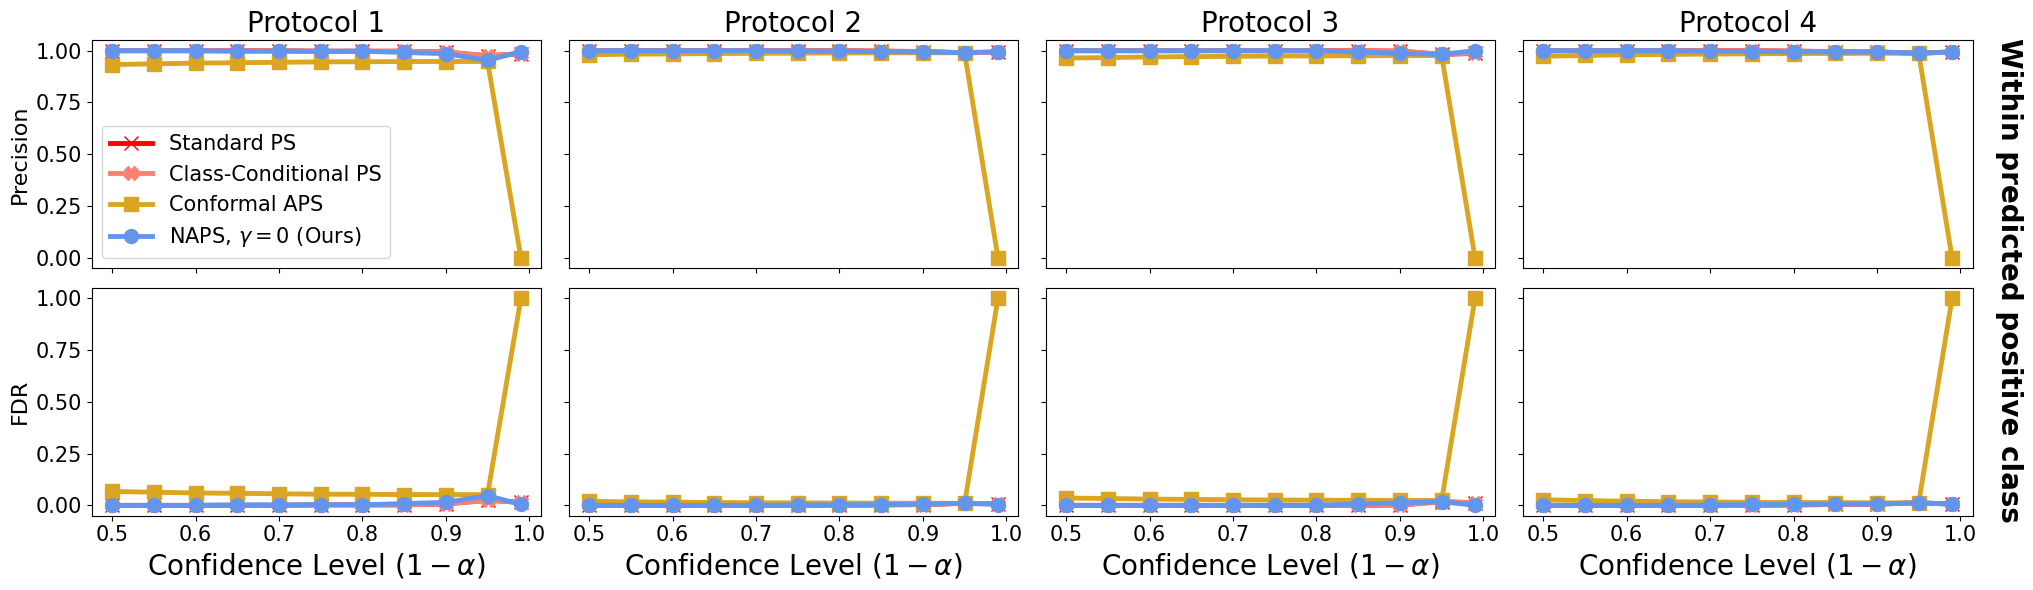

In [60]:
label = 1

fig, ax = plt.subplots(2, 4, figsize=(20, 6))

for i, nu in enumerate(['V2 only', 'V3 only', 'Low V3', 'High V3']):

    linewidth = 3.5
    markersize = 10 
    
    # set-clf
    ax[0][i].plot(
        1-alpha_grid,
        [results_df_baseline_marginal.loc[(results_df_baseline_marginal.loc[:, col] == label) & (nu_test == nu) & (y_test == label), :].shape[0] / results_df_baseline_marginal.loc[(nu_test == nu) & (results_df_baseline_marginal.loc[:, col] == label), :].shape[0]
        for col in results_df_baseline_marginal.drop(columns='true').columns],
        linestyle='-', linewidth=linewidth, marker='x', markersize=markersize, color='red', label='Standard PS'
    )
    ax[1][i].plot(
        1-alpha_grid,
        [results_df_baseline_marginal.loc[(results_df_baseline_marginal.loc[:, col] == label) & (nu_test == nu) & (y_test == (1-label)), :].shape[0] / results_df_baseline_marginal.loc[(nu_test == nu) & (results_df_baseline_marginal.loc[:, col] == label), :].shape[0]
        for col in results_df_baseline_marginal.drop(columns='true').columns],
        linestyle='-', linewidth=linewidth, marker='x', markersize=markersize, color='red', label='Standard PS'
    )

    # set-clf, class-specific
    ax[0][i].plot(
        1-alpha_grid,
        [results_df_baseline_classSpec.loc[(results_df_baseline_classSpec.loc[:, col] == label) & (nu_test == nu) & (y_test == label), :].shape[0] / results_df_baseline_classSpec.loc[(nu_test == nu) & (results_df_baseline_classSpec.loc[:, col] == label), :].shape[0]
        for col in results_df_baseline_classSpec.drop(columns='true').columns],
        linestyle='-', linewidth=linewidth, marker='X', markersize=markersize, color='salmon', label='Class-Conditional PS'
    )
    ax[1][i].plot(
        1-alpha_grid,
        [results_df_baseline_classSpec.loc[(results_df_baseline_classSpec.loc[:, col] == label) & (nu_test == nu) & (y_test == (1-label)), :].shape[0] / results_df_baseline_classSpec.loc[(nu_test == nu) & (results_df_baseline_classSpec.loc[:, col] == label), :].shape[0]
        for col in results_df_baseline_classSpec.drop(columns='true').columns],
        linestyle='-', linewidth=linewidth, marker='X', markersize=markersize, color='salmon', label='Class-Conditional PS'
    )

    # conformal APS
    ax[0][i].plot(
        1-alpha_grid,
        [results_df_conformal.loc[(results_df_conformal.loc[:, col] == label) & (nu_test == nu) & (y_test == label), :].shape[0] / results_df_conformal.loc[(nu_test == nu) & (results_df_conformal.loc[:, col] == label), :].shape[0]
        if results_df_conformal.loc[(nu_test == nu) & (results_df_conformal.loc[:, col] == label), :].shape[0] != 0 else 0 for col in results_df_conformal.drop(columns='true').columns],
        linestyle='-', linewidth=linewidth, marker='s', markersize=markersize, color='goldenrod', label='Conformal APS'
    )
    ax[1][i].plot(
        1-alpha_grid,
        [results_df_conformal.loc[(results_df_conformal.loc[:, col] == label) & (nu_test == nu) & (y_test == (1-label)), :].shape[0] / results_df_conformal.loc[(nu_test == nu) & (results_df_conformal.loc[:, col] == label), :].shape[0]
        if results_df_conformal.loc[(nu_test == nu) & (results_df_conformal.loc[:, col] == label), :].shape[0] != 0 else 1 for col in results_df_conformal.drop(columns='true').columns],
        linestyle='-', linewidth=linewidth, marker='s', markersize=markersize, color='goldenrod', label='Conformal APS'
    )

    # ours
    ax[0][i].plot(
        1-alpha_grid,
        [results_df_conservative.loc[(results_df_conservative.loc[:, col] == label) & (nu_test == nu) & (y_test == label), :].shape[0] / results_df_conservative.loc[(nu_test == nu) & (results_df_conservative.loc[:, col] == label), :].shape[0]
        for col in results_df_conservative.drop(columns='true').columns],
        linestyle='-', linewidth=linewidth, marker='o', markersize=markersize, color='cornflowerblue', label=r'NAPS, $\gamma=0$ (Ours)'
    )
    ax[1][i].plot(
        1-alpha_grid,
        [results_df_conservative.loc[(results_df_conservative.loc[:, col] == label) & (nu_test == nu) & (y_test == (1-label)), :].shape[0] / results_df_conservative.loc[(nu_test == nu) & (results_df_conservative.loc[:, col] == label), :].shape[0]
        for col in results_df_conservative.drop(columns='true').columns],
        linestyle='-', linewidth=linewidth, marker='o', markersize=markersize, color='cornflowerblue', label=r'NAPS, $\gamma=0$ (Ours)f'
    )

    ax[0][i].set_ylim(-0.05, 1.05)
    ax[1][i].set_ylim(-0.05, 1.05)

    ax[0][i].tick_params(axis='both', which='major', labelsize=15)
    ax[1][i].tick_params(axis='both', which='major', labelsize=15)
    if i != 0:
        ax[0][i].tick_params(labelleft=False)
        ax[1][i].tick_params(labelleft=False)
    ax[0][i].tick_params(labelbottom=False)

    ax[1][i].set_xlabel(r'Confidence Level $(1-\alpha)$', fontsize=20)
    ax[0][i].set_title(f'Protocol {i+1}', fontsize=20)

    ax[0][0].set_ylabel("Precision" if label == 1 else "NPV", fontsize=16)
    ax[1][0].set_ylabel("FDR" if label == 1 else "False Omission Rate", fontsize=16)

ax[0][0].legend(loc='lower left', prop={'size': 15})
#plt.figtext(0.5,0.95, "Precision", ha="center", va="top", fontsize=15)
#plt.figtext(0.5,0.49, "FDR", ha="center", va="top", fontsize=15)
plt.figtext(1,0.13, r'Within predicted {label}'.format(label=('positive class' if label == 1 else 'negative class')), fontsize=20, rotation=270, fontweight=777)
plt.tight_layout()
plt.savefig(f'./results/figures/within_predicted{"_positive" if label == 1 else "_negative"}.pdf', bbox_inches='tight')
plt.show()